In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

In [4]:
import kagglehub

path = kagglehub.dataset_download("rohanrao/air-quality-data-in-india")

print("Path to dataset files:", path)

100%|██████████| 72.9M/72.9M [02:04<00:00, 615kB/s]

Extracting files...


Path to dataset files: C:\Users\Mayan\.cache\kagglehub\datasets\rohanrao\air-quality-data-in-india\versions\12


In [6]:
data = pd.read_csv(r'/kaggle/input/air-quality-data-in-india/city_day.csv',index_col='Date')
print("Data loaded successfully.")
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/air-quality-data-in-india/city_day.csv'

In [6]:
data =data.sort_index()

In [7]:
df = data[data['City'] == 'Bhopal']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 2019-09-17 to 2020-07-01
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        289 non-null    object 
 1   PM2.5       280 non-null    float64
 2   PM10        280 non-null    float64
 3   NO          280 non-null    float64
 4   NO2         280 non-null    float64
 5   NOx         280 non-null    float64
 6   NH3         280 non-null    float64
 7   CO          280 non-null    float64
 8   SO2         280 non-null    float64
 9   O3          280 non-null    float64
 10  Benzene     0 non-null      float64
 11  Toluene     0 non-null      float64
 12  Xylene      0 non-null      float64
 13  AQI         278 non-null    float64
 14  AQI_Bucket  278 non-null    object 
dtypes: float64(13), object(2)
memory usage: 36.1+ KB


In [9]:
df.drop(['City','Benzene','Toluene','Xylene'],axis =1,inplace =True)

In [10]:
for col in df.columns:
    print(col)
    print(df[col].isna().sum())

PM2.5
9
PM10
9
NO
9
NO2
9
NOx
9
NH3
9
CO
9
SO2
9
O3
9
AQI
11
AQI_Bucket
11


In [11]:
df.dropna(subset=['AQI_Bucket'],inplace =True)

In [12]:
print(df['AQI_Bucket'].unique())

['Satisfactory' 'Good' 'Moderate' 'Poor' 'Very Poor']


In [14]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,50.207230,119.715755,7.029460,31.373561,22.446115,19.018058,0.880719,13.060432,59.824209,132.827338
std,30.486187,54.058649,6.192872,18.446136,13.812489,8.078291,0.368312,6.163342,16.683928,56.000829
min,3.400000,13.160000,0.590000,4.250000,3.050000,6.910000,0.270000,3.360000,18.930000,37.000000
25%,23.167500,83.060000,2.270000,11.975000,8.432500,14.690000,0.562500,9.065000,47.357500,98.000000
50%,45.015000,120.920000,5.230000,32.500000,22.845000,17.250000,0.870000,12.120000,60.130000,120.000000
75%,70.262500,153.337500,9.702500,46.470000,31.695000,20.977500,1.130000,14.892500,71.957500,150.500000
max,136.420000,260.270000,30.940000,75.670000,59.010000,51.910000,2.040000,47.460000,109.330000,312.000000


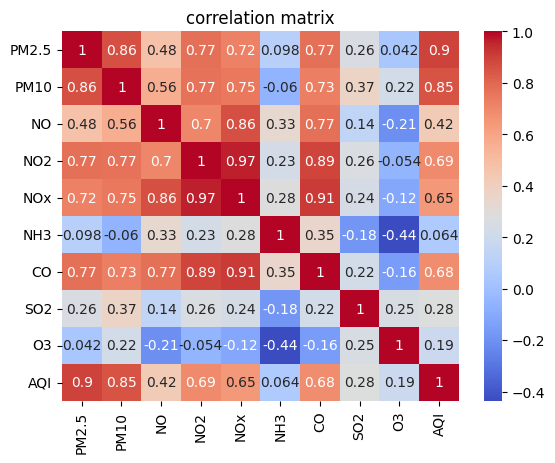

In [15]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot =True,cmap ='coolwarm')
plt.title('correlation matrix')
plt.show()

In [16]:
def plot(data,x=None,y='AQI',hue ='AQI_Bucket'):
  cols = x or [c for c in data.columns if c !=y ]
  for col in cols:
    plt.figure(figsize=(10,6))
    sns.regplot(data= data,x=col,y=y)
    plt.xlabel(col)
    plt.ylabel('AQI')
    plt.title(f'AQI vs {col}')
    plt.legend()
    plt.show()

In [17]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI',
       'AQI_Bucket'],
      dtype='object')

In [18]:
df_new = df.select_dtypes(include = np.number)

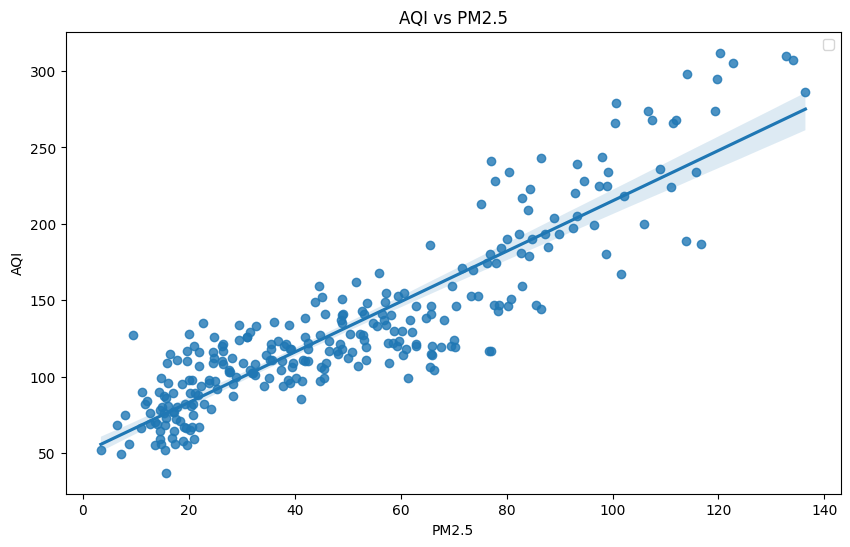

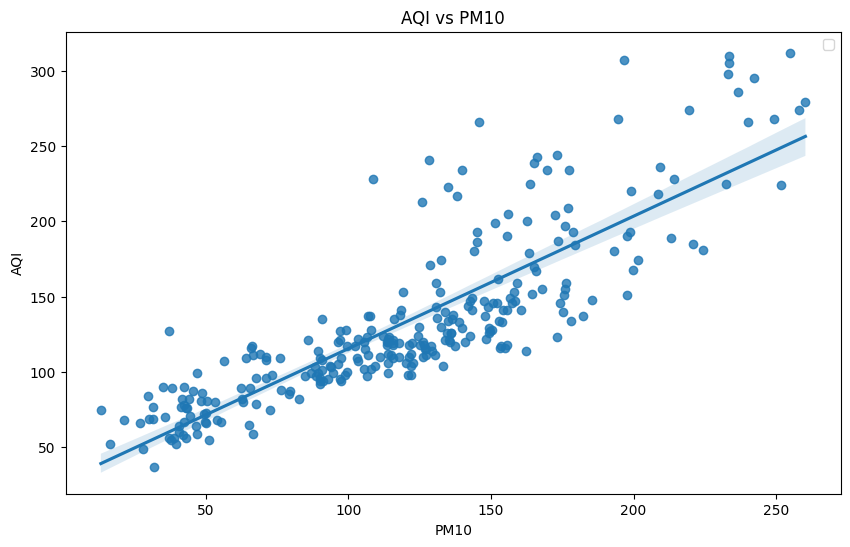

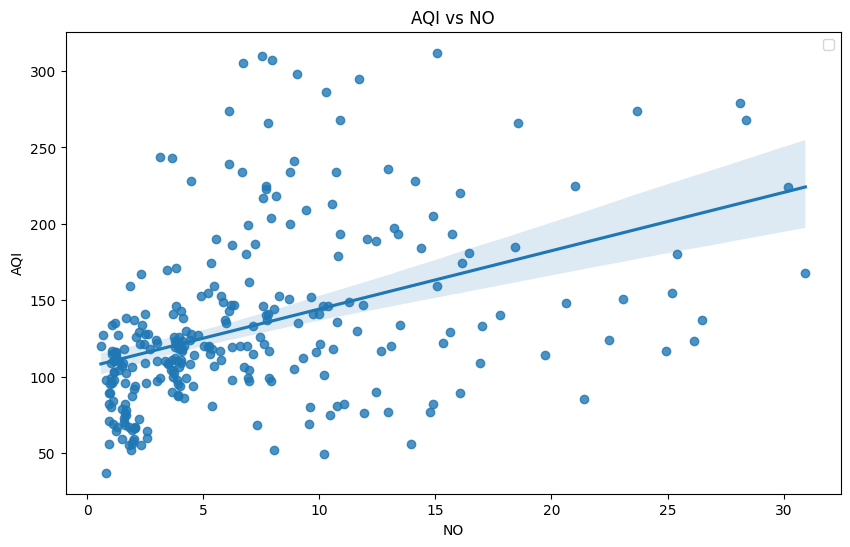

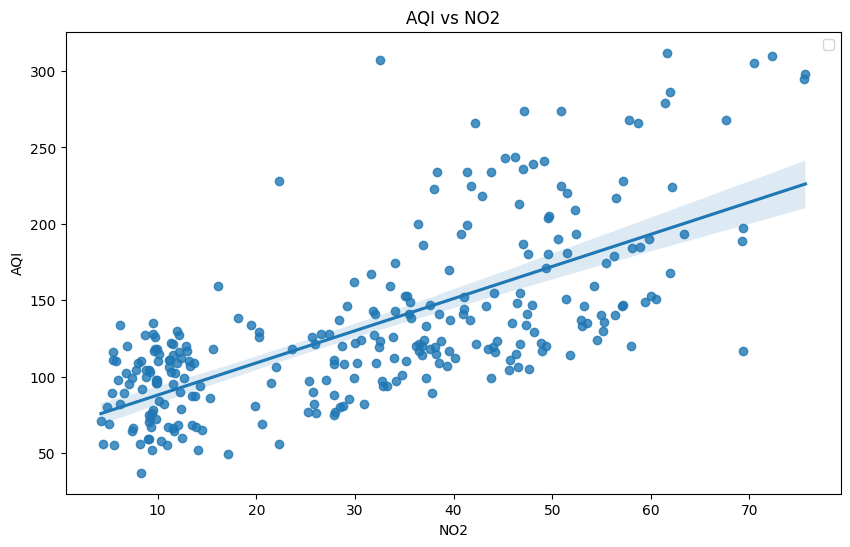

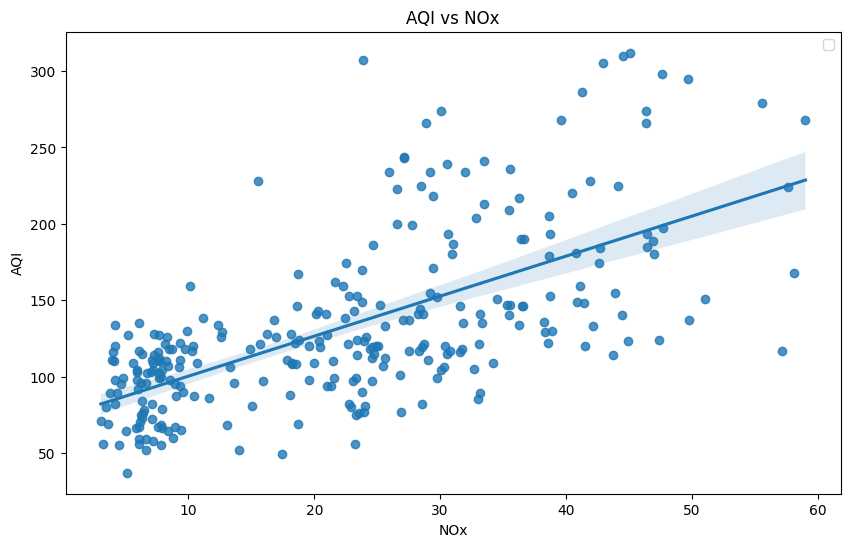

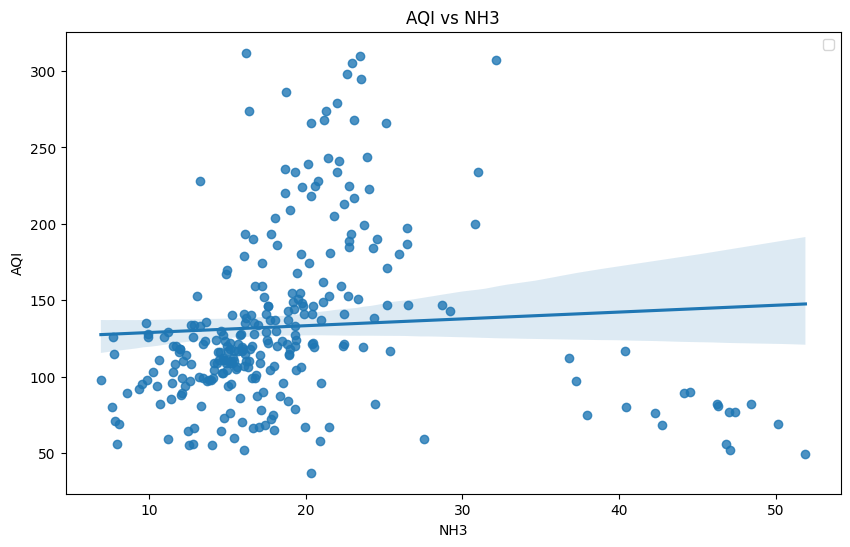

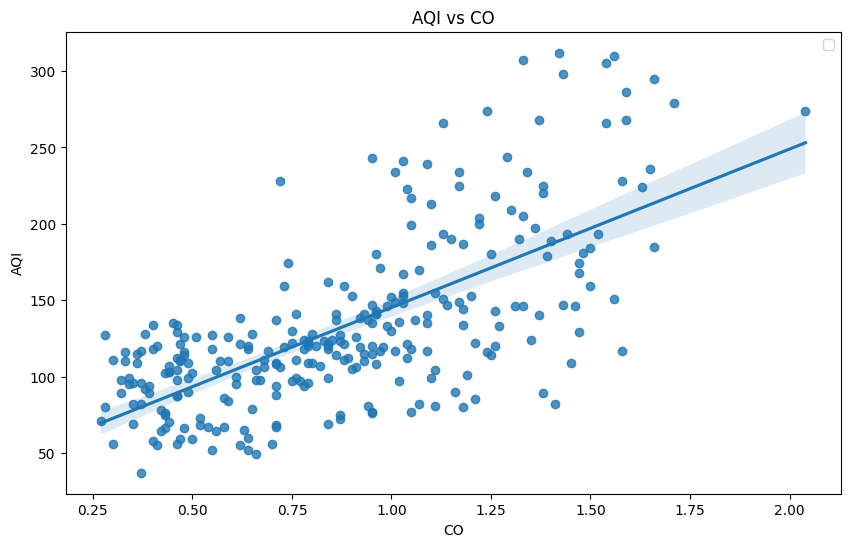

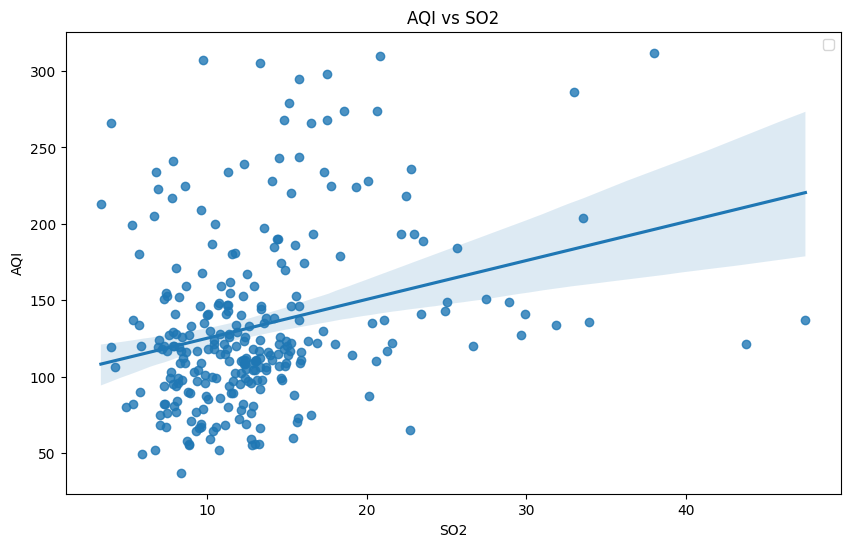

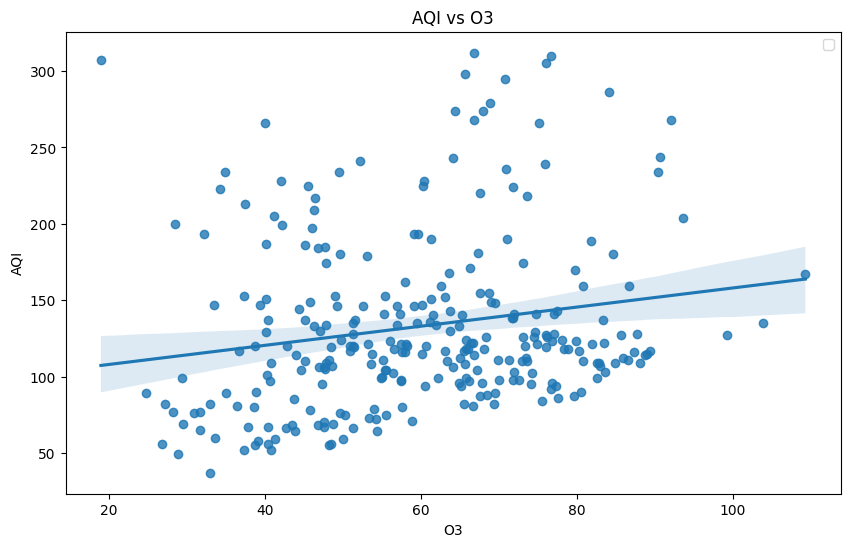

In [19]:
plot(df_new)

## From the corr matrix we can analyse that the features such as PM10, NO, NOx, and CO exhibit high multicollinearity (|r| > 0.85) so we will drop them Also the above visualizaiton makes it very smooth to do so.


In [20]:
df =df.drop(columns =['PM10', 'NO', 'NOx', 'CO'],axis =1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 2019-09-18 to 2020-07-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       278 non-null    float64
 1   NO2         278 non-null    float64
 2   NH3         278 non-null    float64
 3   SO2         278 non-null    float64
 4   O3          278 non-null    float64
 5   AQI         278 non-null    float64
 6   AQI_Bucket  278 non-null    object 
dtypes: float64(6), object(1)
memory usage: 25.5+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['AQI_Bucket'] = label.fit_transform(df['AQI_Bucket'])

In [23]:
X = df[['PM2.5', 'NO2', 'NH3', 'SO2', 'O3', 'AQI']]
y = df['AQI_Bucket']
label = LabelEncoder()
y_encoded = label.fit_transform(y)

In [24]:
df =df.sort_index()

In [25]:
n =len(df)
split = max(1, int(n * 0.7))
X_train =X.iloc[:split]
X_test =X.iloc[split:]
y_train=y_encoded[:split]
y_test =y_encoded[split:]

In [26]:
log_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(multi_class= 'multinomial'))
])

ridge_pipe = Pipeline([
    ('Scaler', StandardScaler()),
    ('model', RidgeClassifier())
])

svm_pipe= Pipeline([
    ('Scaler', StandardScaler()),
    ('model', SVC(kernel='rbf', random_state=42))
])

randomf_pipe = Pipeline([
    ('Scaler', StandardScaler()),
    ('model', RandomForestClassifier()
    )
])

In [27]:
models ={
    'Logistic Regression': log_pipe,
    'Ridge Classifier': ridge_pipe,
    'SVM': svm_pipe,
    'Random Forest': randomf_pipe
}

In [28]:
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(name)
    print(f"Accuracy: {acc}")
    print(f"F1 Score: {f1}")
    print(classification_report(y_test, y_pred))
    print("="*50)

Logistic Regression
Accuracy: 0.8571428571428571
F1 Score: 0.853781512605042
              precision    recall  f1-score   support

           1       0.97      0.72      0.82        39
           3       0.80      0.98      0.88        45

    accuracy                           0.86        84
   macro avg       0.88      0.85      0.85        84
weighted avg       0.88      0.86      0.85        84

Ridge Classifier
Accuracy: 0.4523809523809524
F1 Score: 0.3086309523809524
              precision    recall  f1-score   support

           1       0.46      0.95      0.62        39
           3       0.33      0.02      0.04        45

    accuracy                           0.45        84
   macro avg       0.40      0.49      0.33        84
weighted avg       0.39      0.45      0.31        84

SVM
Accuracy: 0.8928571428571429
F1 Score: 0.8929333360424242
              precision    recall  f1-score   support

           1       0.88      0.90      0.89        39
           3       0.91

In [37]:
randomf_pipe.fit(X_train, y_train)

y_train_pred = randomf_pipe.predict(X_train)
y_test_pred = randomf_pipe.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))


Train Accuracy: 1.0
Test Accuracy: 1.0

Test Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        45

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [29]:
def confusion(model_name,model,X_test,y_test):
  ypred =model.predict(X_test)
  cm = confusion_matrix(y_test,ypred)
  plt.figure(figsize=(10,6))
  sns.heatmap(cm,annot =True,cmap ='coolwarm')
  plt.title(f'confusion matrix,{model_name}')
  plt.xlabel('predicted Label')
  plt.ylabel('True Label')
  plt.show()

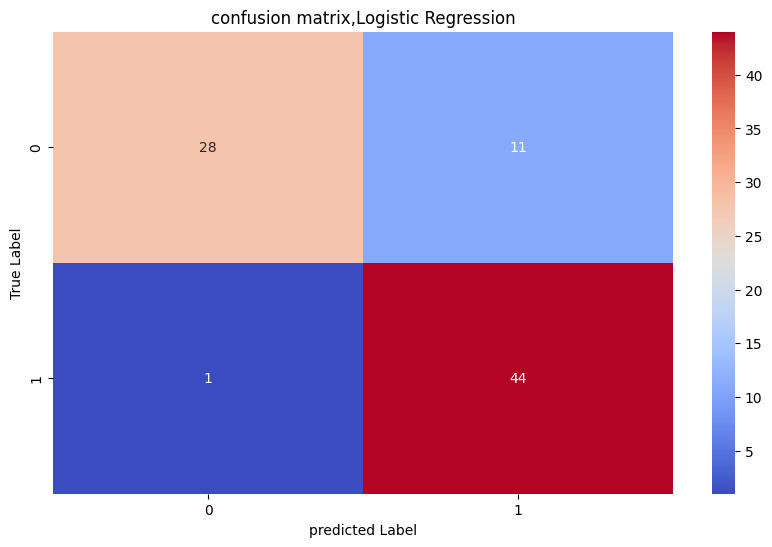

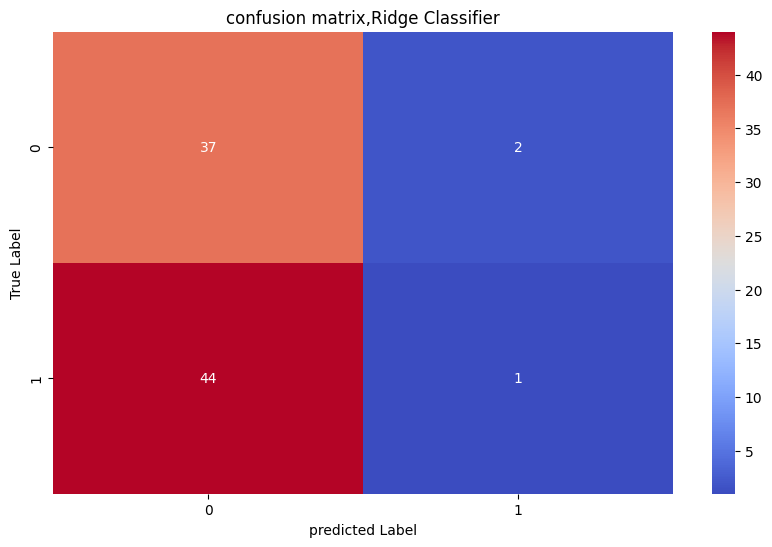

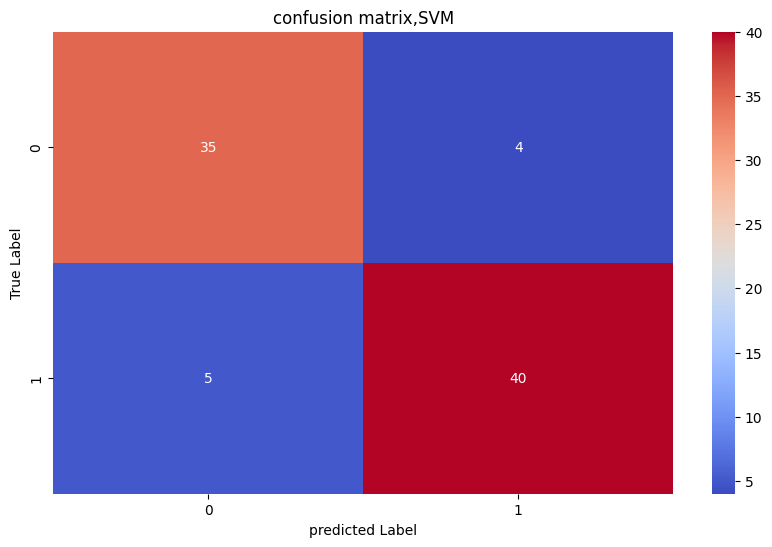

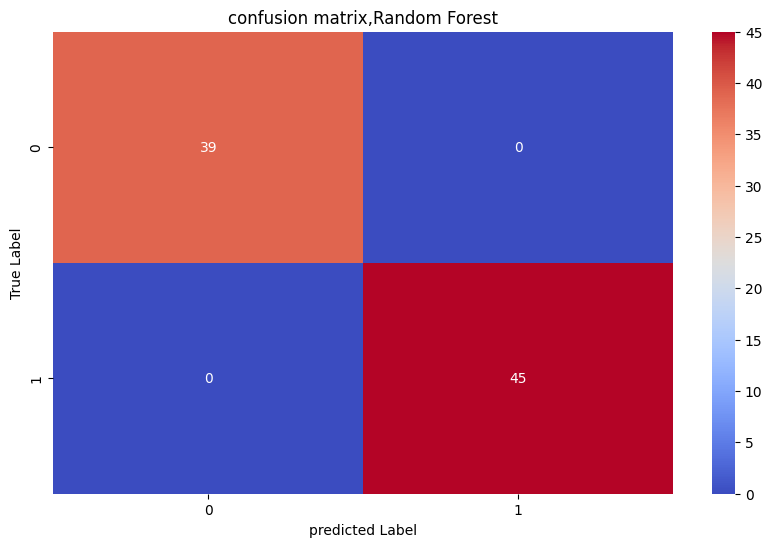

In [30]:
for i in models.items():
  confusion(i[0],i[1],X_test,y_test)


--- SHAP Feature Importance ---


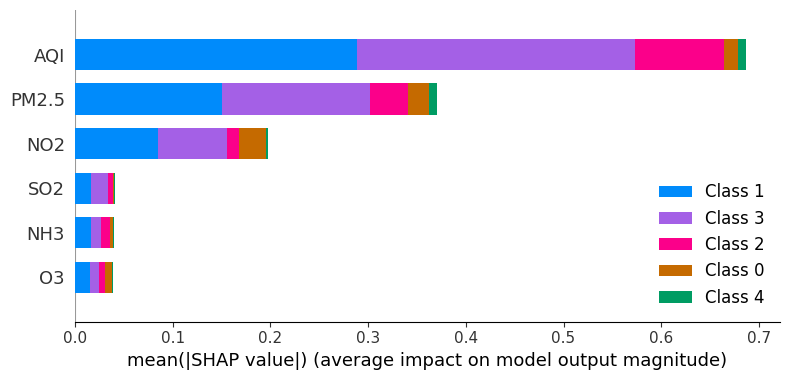


--- SHAP Summary Plot ---


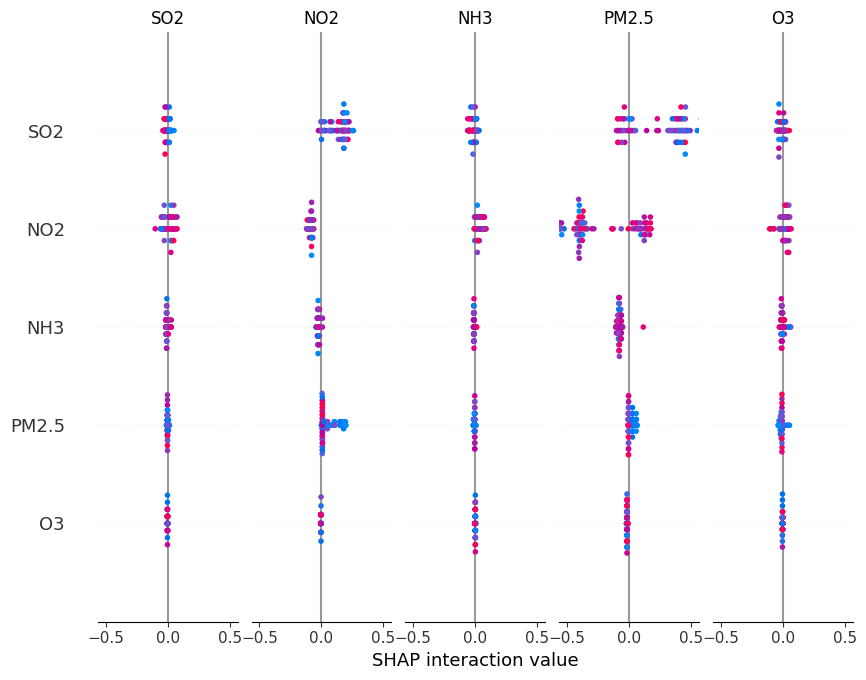

In [31]:
import shap
final_model = models['Random Forest']
Features= ['PM2.5', 'NO2', 'NH3', 'SO2', 'O3', 'AQI']

final_model.fit(X_train, y_train)

scaler = final_model.named_steps['Scaler']
rf_model = final_model.named_steps['model']

X_scaled = scaler.transform(X_test)

explainer = shap.TreeExplainer(final_model.named_steps['model'])
shap_values = explainer.shap_values(X_scaled)

print("\n--- SHAP Feature Importance ---")
shap.summary_plot(shap_values, X_scaled, plot_type="bar", feature_names=Features)

print("\n--- SHAP Summary Plot ---")
shap.summary_plot(shap_values, X_scaled, feature_names=Features)


Model saved successfully!


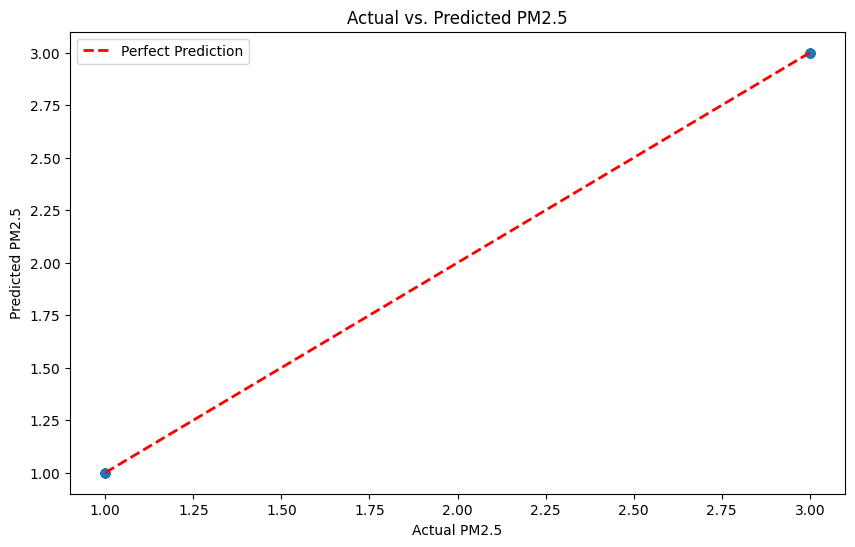

In [39]:
joblib.dump(final_model, 'aqi_prediction_pipeline.pkl')
print("\nModel saved successfully!")

yfinal_pred = final_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, yfinal_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5')
plt.legend()
plt.show()
